In [267]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nfl_data_py  as nfl

In [248]:
draft_picks = nfl.import_draft_picks
selected_draft_picks = draft_picks(years = range(2013,2024))

In [249]:
offset_list = [['GNB', 'GB'],
 ['KAC', 'KC'],
 ['LA', 'LAR'],
 ['LV', 'LVR'],
 ['NOR', 'NO'],
 ['NWE', 'NE'],
 ['OAK', 'LVR'],
 ['SD', 'SDG'],
 ['SDG', 'LAC'],
 ['SFO', 'SF'],
 ['STL', 'LAR'],
 ['TAM', 'TB']]

In [250]:
team_win_v_picks = pd.DataFrame()

In [251]:
temp_df_draft= selected_draft_picks.groupby(['team']).count()['round']
temp_df_draft.index.names = ['team']
#temp_df.columns.names = ['wins']

temp_df_draft = temp_df_draft.reset_index()
for i in range(len(offset_list)):
    temp_df_draft.loc[temp_df_draft['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df_draft = temp_df_draft.groupby('team').sum()

In [252]:
team_win_v_picks['picks'] = temp_df_draft

In [253]:
schedules = nfl.import_schedules(years = range(2013,2024))

In [254]:
def find_winner(point_dif,home,away):


    if point_dif > 0:
        winner = home
    elif point_dif < 0:
        winner = away

    else:
        winner = 'tie'


    return winner

In [255]:
schedules['winning_id'] = schedules.apply(lambda row: find_winner(row['result'],row['home_team'],row['away_team']), axis=1)

In [256]:
temp_df =  schedules[schedules['game_type'] == 'REG'].groupby(['winning_id']).count()['game_id']

temp_df.index.names = ['team']
#temp_df.columns.names = ['wins']

temp_df = temp_df.reset_index()
for i in range(len(offset_list)):
    temp_df.loc[temp_df['team'] == offset_list[i][0],'team'] = offset_list[i][1]

temp_df = temp_df.groupby('team').sum()

In [257]:
len(temp_df)

33

In [258]:
team_win_v_picks['wins']  = temp_df

In [261]:
team_desc = nfl.import_team_desc().set_index('team_abbr')


In [270]:
team_desc.columns

Index(['team_name', 'team_id', 'team_nick', 'team_conf', 'team_division',
       'team_color', 'team_color2', 'team_color3', 'team_color4',
       'team_logo_wikipedia', 'team_logo_espn', 'team_wordmark',
       'team_conference_logo', 'team_league_logo', 'team_logo_squared'],
      dtype='object')

KeyError: 'KAN'

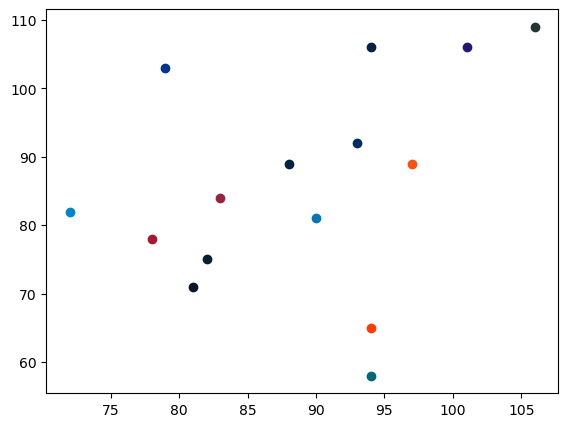

In [273]:
curr_fig = plt.figure()
curr_ax = curr_fig.add_axes([.15,.15,.8,.8])

for i in range(len(team_win_v_picks)):
    curr_team = team_win_v_picks.index[i]
    curr_row = team_win_v_picks.loc[curr_team]
    curr_ax.scatter(curr_row['picks'],curr_row['wins'],color = team_desc.loc[curr_team,'team_color'])

    #print(curr_team)
               


curr_ax.plot([0,200],[0,200])

curr_ax.set_xlim([50,120])
curr_ax.set_ylim([50,120])

In [269]:
curr_row = team_win_v_picks.loc[curr_team]
print(curr_row)

picks    93.0
wins     67.0
Name: WAS, dtype: float64


In [259]:
team_win_v_picks.index

Index(['ARI', 'ATL', 'BAL', 'BUF', 'CAR', 'CHI', 'CIN', 'CLE', 'DAL', 'DEN',
       'DET', 'GB', 'HOU', 'IND', 'JAX', 'KAN', 'LAC', 'LAR', 'LVR', 'MIA',
       'MIN', 'NE', 'NO', 'NYG', 'NYJ', 'PHI', 'PIT', 'SEA', 'SF', 'TB', 'TEN',
       'WAS'],
      dtype='object', name='team')

In [ ]:
team_win_v_picks = team_win_v_picks.reset_index()

In [ ]:
#team_win_v_picks


for i in range(len(offset_list)):
    team_win_v_picks[team_win_v_picks['team'] == offset_list[i][0]]['team'] = offset_list[i][1]



In [ ]:
team_win_v_picks

In [ ]:
team_win_v_picks.plot()